<h1>Text Classification using Regularized Logistic Regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overfitting-&amp;-Regualarization-Theory" data-toc-modified-id="Overfitting-&amp;-Regualarization-Theory-1">Overfitting &amp; Regualarization Theory</a></span><ul class="toc-item"><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-1.1">Overfitting</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.2">Regularization</a></span><ul class="toc-item"><li><span><a href="#$l_2$-normalisation" data-toc-modified-id="$l_2$-normalisation-1.2.1">$l_2$ normalisation</a></span></li><li><span><a href="#$l_1$-normalisation" data-toc-modified-id="$l_1$-normalisation-1.2.2">$l_1$ normalisation</a></span></li></ul></li><li><span><a href="#Stochastic-Gradient-Ascent-(Bonus!)" data-toc-modified-id="Stochastic-Gradient-Ascent-(Bonus!)-1.3">Stochastic Gradient Ascent (Bonus!)</a></span></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-Third-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-Third-Iteration-2">Machine Learning Project Lifecycle: Third Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-2.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Logistic-Regression" data-toc-modified-id="Machine-Learning-Algorithm:-Logistic-Regression-2.4">Machine Learning Algorithm: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Sklearn-Logistic-Regression-with-l2-norm-for-Binary-Classification" data-toc-modified-id="Sklearn-Logistic-Regression-with-l2-norm-for-Binary-Classification-2.4.1">Sklearn Logistic Regression with l2 norm for Binary Classification</a></span></li><li><span><a href="#Logistic-Regression-with-l2-norm-for-Binary-Classification" data-toc-modified-id="Logistic-Regression-with-l2-norm-for-Binary-Classification-2.4.2">Logistic Regression with l2 norm for Binary Classification</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.5">Model Evaluation</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-2.6">Quality Metrics</a></span></li><li><span><a href="#Model-Evaluation-on-Test-Dataset" data-toc-modified-id="Model-Evaluation-on-Test-Dataset-2.7">Model Evaluation on Test Dataset</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-3">Homework</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Overfitting & Regualarization Theory

### Overfitting

$ \displaystyle error \: = \: \frac {\#mistakes \:} {\: length \: of \: dataset}$

$ \displaystyle accuracy \: = \: \frac {\#correct \:} {\: length \: of \: dataset}$

**What is overfitting?**

- $ training\_error(w) = 0 $
- $ training\_error(w^*) > training\_error(\hat w) $
- $ test\_error(w^*) < test\_error(\hat w) $

*TODO following diagram:*

- Add a diagram to which shows 2nd & 3rd point
- Overfitting using two words with linear, quardratic (^ 2), ^ 6, ^ 20 features which uses decision boundry
    - Often Overfitting is associated with very large estimated coefficients
- Impact of overfitting on LR -> Overconfident classifiers with w, w * 2, w * 3 & output of sigmoid function

**Overfitting as a function of Model complexity**

**Overconfident Classification**

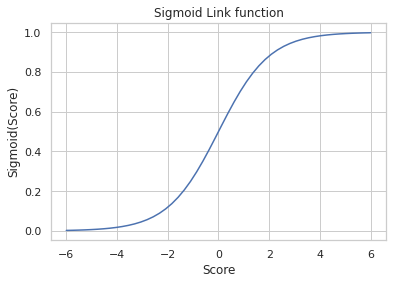

In [108]:
import numpy as np

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

def sigmoid(value):
    return 1 / (1 + np.exp(-value))

x = np.linspace(-6, 6)
y = sigmoid(x)

data = {'Score': x, 'Sigmoid(Score)': y}
ax = sns.lineplot(x='Score', y='Sigmoid(Score)', data=data)
ax.set(xlabel='Score', ylabel='Sigmoid(Score)')
ax.set(title='Sigmoid Link function');

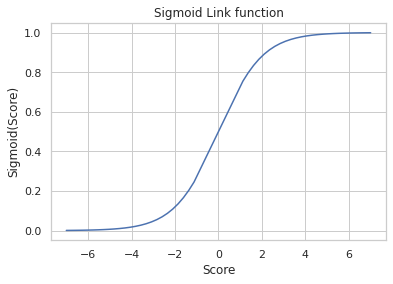

In [137]:
x = np.array([val + 1 if val > 0 else val - 1 for val in np.linspace(-6, 6)])
y = sigmoid(x)

data = {'Score': x, 'Sigmoid(Score)': y}
ax = sns.lineplot(x='Score', y='Sigmoid(Score)', data=data)
ax.set(xlabel='Score', ylabel='Sigmoid(Score)')
ax.set(title='Sigmoid Link function');

**Bias Variance Tradeoff**

- TODO: Add a plot which talk about finding a sweet spot between bias & variance

### Regularization

- All about controlling the magnitude of the coefficients

$ total \: quality = measure \: of \: fit - measure \: of \: magnitude \: of \: coefficients $

- $measure \: of \: fit = \ell\ell(w)$
- $\ell\ell(w) = {\displaystyle \ln \prod_{i=1}^N P(y_i | x_i, w)}$
- $ measure \: of \: magnitude \: of \: coefficients = \: ???$

#### $l_2$ normalisation

$ \| w \|_2^2 = w_0^2 \: + \: w_1^2 \: + \: ... \: + \: w_d^2$ 

$ total \: quality = \ell\ell(w) - \lambda \| w \|_2^2 $

**How different values of $\lambda$ impacts the coefficients?**

- if $\lambda = 0$ -> Standard Logistic Regression solution


- if $\lambda = \infty$ -> All weight is on regularization so $\hat w = 0$ 


- if $\lambda$ is in between -> Balances data fit against the magnitude of coefficients

**How it controls Bias Variance tradeoff?**

- Large $\lambda$ -> *high bias, low variance* ie. $\hat w = 0 for \lambda = \infty$
    - [ ] TODO: Try this


- Smalll $\lambda$ -> *low bias, high variance* ie. higher order polynomial fit with $\lambda = 0$ 

**TODO: Coefficient Path plot**

**TODO: Decision boundry plot using different linear -> ^ 20 features**

**High Level Algorithm**

*High Level Algorithm for Single data point*

- while not converged:

    - $ \displaystyle w ^ {t + 1} = w ^ {t}  + n {\displaystyle \frac{ \partial l}{\partial w_j}} - \lambda \frac{ \partial \| w \|_2^2}{\partial w_j}$
    
$ {\displaystyle \frac{ \partial (w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

${\displaystyle \frac{ \partial \| w \|_2^2}{\partial w_j}} = {\displaystyle \frac{ \partial [w_0^2 \: + \: w_1^2 \: + ... \: + \: w_j^2 \: + ... \: + \: w_d^2]}{\partial w_j}} = 2w_j$

#### $l_1$ normalisation

$ \| w \|_1 = | w_0 | \: + \: | w_1 | \: + \: ... \: + \: | w_d |$ 

$ total \: quality = \ell\ell(w) - \lambda \| w \|_1 $

**How different values of $\lambda$ impacts the coefficients?**

- if $\lambda = 0$ -> Standard Logistic Regression solution


- if $\lambda = \infty$ -> All weight is on regularization so $\hat w = 0$ 


- if $\lambda$ is in between -> Balances data fit against the magnitude of coefficients

**TODO: Coefficient Path Plot**

### Stochastic Gradient Ascent (Bonus!)

## Machine Learning Project Lifecycle: Third Iteration

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [1]:
import pandas as pd

In [2]:
complaints_training_dataset = pd.read_csv('../datasets/consumer_complaints_training_dataset.csv')

In [3]:
complaints_training_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other","My name is XXXX XXXX XXXX , not XXXX X..."
1,"Credit reporting, repair, or other",I was shocked when I reviewed my credit report...
2,"Credit reporting, repair, or other",Equifax misused of credit file. Disputing acco...
3,"Credit reporting, repair, or other",I am disturbed that you continue to list the v...
4,"Credit reporting, repair, or other",I went to multiple different credit report web...


In [4]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         20000 non-null  object
 1   Complaint_text  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


**Q) What is the distribution of complaints for each product type?**

In [5]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [6]:
complaints_training_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


**Q) Find out the Occurances of Duplicate Text messages if any?**

In [7]:
complaints_training_dataset['Complaint_text'].nunique()

19913

In [8]:
duplicate_complaints = complaints_training_dataset['Complaint_text']\
    .value_counts()\
    [complaints_training_dataset['Complaint_text'].value_counts() > 2].index

In [9]:
len(duplicate_complaints)

9

### Preprocessing + Feature Engineering

- TODO: tfidf

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

In [11]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state=RANDOM_STATE)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000,), (4000,), (16000,), (4000,))

In [14]:
X_train_count_vectorizer = count_vectorizer.fit_transform(X_train)
X_test_count_vectorizer = count_vectorizer.transform(X_test)

In [15]:
len(count_vectorizer.get_feature_names())

5000

In [16]:
count_vectorizer.get_feature_names()[:10]

['00', '000', '10', '100', '1000', '10000', '100000', '1005', '11', '110']

In [17]:
list(count_vectorizer.vocabulary_.items())[:10]

[('xxxx', 4976),
 ('account', 322),
 ('listed', 2727),
 ('credit', 1279),
 ('report', 3828),
 ('experian', 1842),
 ('paid', 3234),
 ('closed', 1021),
 ('2007', 63),
 ('like', 2712)]

In [18]:
X_train_count_vectorizer.shape, X_test_count_vectorizer.shape

((16000, 5000), (4000, 5000))

### Machine Learning Algorithm: Logistic Regression

#### Sklearn Logistic Regression with l2 norm for Binary Classification

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
sklearn_binary_classifier = LogisticRegression(penalty='l2',
                                               max_iter=101,
                                               random_state=RANDOM_STATE)

In [59]:
sklearn_binary_classifier.fit(X_train_count_vectorizer, y_train == 'Student loan')

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=101,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
sklearn_binary_classifier_predictions = sklearn_binary_classifier.predict(X_test_count_vectorizer)

In [61]:
sklearn_binary_classifier_score = accuracy_score(y_test == 'Student loan', sklearn_binary_classifier_predictions)
sklearn_binary_classifier_score

0.9625

#### Logistic Regression with l2 norm for Binary Classification

**Estimating Conditional Probability using Link Function**

$ \displaystyle P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))} $

In [24]:
import numpy as np

def sigmoid(scores):
    return 1.0 / (1 + np.exp(-scores))

def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = sigmoid(scores)
    return predictions

In [25]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),          1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 1./(1+np.exp(-correct_scores[1])) ] )

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_predictions           =', correct_predictions)
print('output of predict_probability =', predict_probability(dummy_feature_matrix, dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_predictions           = [0.98201379 0.26894142]
output of predict_probability = [0.98201379 0.26894142]


**Compute derivative with respect to a single coefficient**

- coefficients($w_1 .. w_j$) with **L2 Penalty** will be derived using

$
\displaystyle \frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$

- For intercept ($w0$) term

$
\displaystyle \frac{\partial\ell}{\partial w_0} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$

We will now write a function that computes the derivative of log likelihood with respect to a single coefficient $w_j$. The function accepts two arguments:
* `errors` vector containing $\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})$ for all $i$.
* `feature` vector containing $h_j(\mathbf{x}_i)$  for all $i$.
* `coefficient` containing the current value of coefficient $w_j$.
* `is_intercept` boolean value indicating whether the given coefficient is intercept ($w_0$) or not.
* `penalty_type` value represeting the type of regularization($l1 \: or \: l2$) to use .
* `penalty_value` constant penalty value $\lambda$.

In [26]:
def feature_derivative(errors, feature,
                       coefficient=None, is_intercept=None,
                       penalty_type=None, penalty_value=None):
    derivative = np.dot(errors, feature)
    if penalty_type is not None and not is_intercept:
        derivative -= 2 * penalty_value * coefficient
    return derivative

**Compute Regularized log likelihood will be given by**

$ \ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) \color{red}{-\lambda\|\mathbf{w}\|_2^2}$

In [27]:
def compute_log_likelihood(feature_matrix, target_labels, target_label,
                           coefficients, penalty_value=None, penalty_type=0):
    indicator = (target_labels == target_label)
    scores = np.dot(feature_matrix, coefficients)
    if penalty_type == 'l2':
        likelihood = np.sum((indicator - 1) * scores - np.log(1 + np.exp(-scores))) \
            - penalty_value * np.sum(coefficients[1:] ** 2)
    else:
        likelihood = np.sum((indicator - 1) * scores - np.log(1 + np.exp(-scores)))
    return likelihood

In [28]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])
dummy_sentiment = np.array([-1, 1])

correct_indicators = np.array([ -1==+1, 1==+1])
correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),  1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_first_term  = np.array( [ (correct_indicators[0]-1)*correct_scores[0],
                                 (correct_indicators[1]-1)*correct_scores[1] ] )
correct_second_term = np.array( [ np.log(1. + np.exp(-correct_scores[0])), 
                                 np.log(1. + np.exp(-correct_scores[1])) ] )

correct_ll          =      sum( [ correct_first_term[0]-correct_second_term[0],
                                 correct_first_term[1]-correct_second_term[1] ] ) 

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_log_likelihood           =', correct_ll)
print('output of compute_log_likelihood =', compute_log_likelihood(dummy_feature_matrix,
                                                                   dummy_sentiment,
                                                                   1,
                                                                   dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_log_likelihood           = -5.331411615436032
output of compute_log_likelihood = -5.331411615436032


**Train Binary Logistic Regression Classifier model using Gradient Ascent**

In [29]:
def train_binary_lr_classifier(
        features_matrix, target_labels, target_label,
        initial_coefficients, step_size, max_iterations,
        penalty_type=None, penalty_value=0, debug=False):
    coefficients = np.array(initial_coefficients)
    likelihood_values = []
    for iteration in range(max_iterations):
        predictions = predict_probability(features_matrix, coefficients)
        
        indicator = (target_labels == target_label)
        
        errors = indicator - predictions
        
        for j in range(len(coefficients)):
            is_intercept = (j == 0)
            derivative = feature_derivative(errors, features_matrix[:, j],
                                            coefficients[j], is_intercept,
                                            penalty_type, penalty_value)
            coefficients[j] += step_size * derivative

        lp = compute_log_likelihood(features_matrix, target_labels,
                                    target_label, coefficients,
                                    penalty_type, penalty_value)
        likelihood_values.append(lp)
        if debug:
            if (iteration <= 100 and iteration % 10 == 0)\
                or (iteration <= 1000 and iteration % 100 == 0)\
                or (iteration <= 10000 and iteration % 1000 == 0)\
                or iteration % 10000 == 0:
                print('----------------------------------')
                print(f'Iteration: {iteration} -> Likelihood value: {lp} for {target_label} classifier.')
                predicted_probabilities = predict_probability(features_matrix, coefficients)
                predicted_classes = predicted_probabilities > .5
                correct_predictions = predicted_classes == (target_labels == target_label)
                print(f'Minimum Probability:{predictions.min()},',
                      f'Maximum Probability:{predictions.max()},',
                      f'Current Accuracy: {correct_predictions.sum() / len(target_labels)}')
    if not debug:
        predicted_probabilities = predict_probability(features_matrix, coefficients)
        predicted_classes = predicted_probabilities > .5
        correct_predictions = predicted_classes == (target_labels == target_label)
        print(f'Minimum Probability:{predictions.min()},',
              f'Maximum Probability:{predictions.max()},',
              f'Current Accuracy: {correct_predictions.sum() / len(target_labels)}')
    return coefficients, likelihood_values

**Utility Functions**

In [32]:
import pickle
import time
import os

from sklearn.metrics import accuracy_score

LAST_RESULTS_FILE_NAME = None

def count_vectorized_features_to_features_matrix(count_vectorized_features):
    constant_feature = np.ones((count_vectorized_features.shape[0], 1))
    return np.hstack((constant_feature, count_vectorized_features.toarray()))

def save_experiment_results(results):
    file_name_prefix =  'lr_hyper_params_experiments_results'
    file_name = f'{file_name_prefix}_{time.monotonic_ns()}.pkl'
    print(file_name)
    with open(file_name, 'wb') as results_file:
        pickle.dump(results, results_file)
    return file_name
        
def classify(features_matrix, coefficients):
    prob_predictions = predict_probability(features_matrix, coefficients)
    return prob_predictions > .5

def load_hyper_params_results_and_configs(file_path=None):
    if file_path and os.path.isfile(file_path):
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    else:
        hyper_params_configs = [
            {'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 0},
            {'max_iterations': 501, 'penalty_type': 'l2', 'penalty_value': 0},
            {'max_iterations': 1001, 'penalty_type': 'l2', 'penalty_value': 0},
            {'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 1e1},
            {'max_iterations': 501, 'penalty_type': 'l2', 'penalty_value': 1e1},
            {'max_iterations': 1001, 'penalty_type': 'l2', 'penalty_value': 1e1},
            {'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 1e2},
            {'max_iterations': 501, 'penalty_type': 'l2', 'penalty_value': 1e2},
            {'max_iterations': 1001, 'penalty_type': 'l2', 'penalty_value': 1e2},
            {'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 1e3},
            {'max_iterations': 501, 'penalty_type': 'l2', 'penalty_value': 1e3},
            {'max_iterations': 1001, 'penalty_type': 'l2', 'penalty_value': 1e3}]
        return sorted(hyper_params_configs, key = lambda config: config['max_iterations'])

In [33]:
# TODO: parallelize this using following
# from joblib import Parallel, delayed

# def myfun(arg):
#      do_stuff
#      return result

# results = Parallel(n_jobs=-1, verbose=verbosity_level, backend="threading")(
#              map(delayed(myfun), arg_instances))

import datetime

# Hyper Params

step_size = 1e-5

# Target Variables
target_labels, target_label = y_train, 'Student loan'

# Feature Matrix & Initial Coefficients
X_train_features_matrix = count_vectorized_features_to_features_matrix(X_train_count_vectorizer)
X_test_features_matrix = count_vectorized_features_to_features_matrix(X_test_count_vectorizer)

initial_coefficients = np.zeros(X_train_features_matrix.shape[1])

print(X_train_features_matrix.shape, initial_coefficients.shape, X_test_features_matrix.shape)

hyper_params_experiments_results = load_hyper_params_results_and_configs()

for hyper_params in hyper_params_experiments_results:
    if 'coeffs' in hyper_params:
        continue
    print('---------------------------------')
    print(hyper_params)
    start_time = datetime.datetime.now()
    coefficients, likelihood_values = train_binary_lr_classifier(
        X_train_features_matrix,
        target_labels,
        target_label,
        initial_coefficients,
        step_size = step_size,
        max_iterations = hyper_params['max_iterations'],
        penalty_type = hyper_params['penalty_type'],
        penalty_value = hyper_params['penalty_value']
    )
    time_delta = datetime.datetime.now() - start_time
    hyper_params['coefficients'] = coefficients
    hyper_params['likelihood_values'] = likelihood_values
    hyper_params['time_delta'] = time_delta
    hyper_params['train_dataset_accuracy'] = accuracy_score(
        y_train == 'Student loan',
        classify(X_train_features_matrix, coefficients))
    hyper_params['test_dataset_accuracy'] = accuracy_score(
        y_test == 'Student loan',
        classify(X_test_features_matrix, coefficients))

LAST_RESULTS_FILE_NAME = save_experiment_results(hyper_params_experiments_results)

(16000, 5001) (5001,) (4000, 5001)
---------------------------------
{'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 0}
Minimum Probability:1.7134380244175842e-23, Maximum Probability:1.0, Current Accuracy: 0.9513125
---------------------------------
{'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 10.0}
Minimum Probability:2.787848753789075e-23, Maximum Probability:1.0, Current Accuracy: 0.951375
---------------------------------
{'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 100.0}
Minimum Probability:1.5642499285839832e-21, Maximum Probability:1.0, Current Accuracy: 0.9500625
---------------------------------
{'max_iterations': 101, 'penalty_type': 'l2', 'penalty_value': 1000.0}
Minimum Probability:2.2096905832488215e-12, Maximum Probability:0.9999999999998876, Current Accuracy: 0.9254375
---------------------------------
{'max_iterations': 501, 'penalty_type': 'l2', 'penalty_value': 0}
Minimum Probability:2.6142295788560316e-28, Maximum 

In [70]:
max_unregularized_binary_classifier_accuracy = 0
max_regularized_binary_classifier_accuracy = 0

for hyper_params_result in sorted(
    hyper_params_experiments_results,
    key=lambda value: [value['max_iterations'], value['penalty_value']],
    reverse=False):
    if hyper_params_result['penalty_value'] > 0:
        max_regularized_binary_classifier_accuracy = max(max_regularized_binary_classifier_accuracy,
                                                         hyper_params_result['test_dataset_accuracy'])
    else:
        max_unregularized_binary_classifier_accuracy = max(max_unregularized_binary_classifier_accuracy,
                                                           hyper_params_result['test_dataset_accuracy'])
    print(f"max_iter: {hyper_params_result['max_iterations']},",
          f"penalty: {hyper_params_result['penalty_type']},",
          f"lambda: {hyper_params_result['penalty_value']},",
          #f"train accuracy: {hyper_params_result['train_dataset_accuracy'] * 100},",
          #f"test accuracy: {hyper_params_result['test_dataset_accuracy'] * 100}",
          #f"coff len:{len(hyper_params_result['coefficients'])}",
          #f"likelihood_values len:{len(hyper_params_result['likelihood_values'])}",
          f"coff sum:{sum(hyper_params_result['coefficients'])}")

max_iter: 101, penalty: l2, lambda: 0, coff sum:-6.470139104175344
max_iter: 101, penalty: l2, lambda: 10.0, coff sum:-6.404583738998205
max_iter: 101, penalty: l2, lambda: 100.0, coff sum:-5.861191995719484
max_iter: 101, penalty: l2, lambda: 1000.0, coff sum:-3.0850758730329035
max_iter: 501, penalty: l2, lambda: 0, coff sum:-8.993814468402608
max_iter: 501, penalty: l2, lambda: 10.0, coff sum:-8.489069865211473
max_iter: 501, penalty: l2, lambda: 100.0, coff sum:-5.35012613669932
max_iter: 501, penalty: l2, lambda: 1000.0, coff sum:-0.8443463339801652
max_iter: 1001, penalty: l2, lambda: 0, coff sum:-11.837326874631996
max_iter: 1001, penalty: l2, lambda: 10.0, coff sum:-10.565074757936022
max_iter: 1001, penalty: l2, lambda: 100.0, coff sum:-4.801118054254753
max_iter: 1001, penalty: l2, lambda: 1000.0, coff sum:-0.6863518425736136


In [69]:
print(f'Sklearn Binary Classifer Accuracy Score: {sklearn_binary_classifier_score}\n',
    f'LR unregualrized Binary Classifier Accuracy Score: {max_unregularized_binary_classifier_accuracy}\n',
    f'LR regualrized Binary Classifier Accuracy Score: {max_regularized_binary_classifier_accuracy}')

Sklearn Binary Classifer Accuracy Score: 0.9625
 LR unregualrized Binary Classifier Accuracy Score: 0.9575
 LR regualrized Binary Classifier Accuracy Score: 0.95675


In [83]:
maximum_coeff_index = sklearn_binary_classifier.coef_.argmax()
minimum_coeff_index = sklearn_binary_classifier.coef_.argmin()

print(count_vectorizer.get_feature_names()[maximum_coeff_index],
      sklearn_binary_classifier.coef_.max())
print(count_vectorizer.get_feature_names()[minimum_coeff_index],
      sklearn_binary_classifier.coef_.min())

navient 2.4893148577322575
mortgage -2.1338592177714237


### Model Evaluation

In [43]:
from sklearn.model_selection import cross_val_score

In [46]:
cv_scores = cross_val_score(LogisticRegression(penalty='l2', max_iter=101, random_state=RANDOM_STATE),
                            X_train_count_vectorizer,
                            y_train,
                            cv=5)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [47]:
print(cv_scores.mean())
print(cv_scores)

0.8439375
[0.8484375 0.8446875 0.8415625 0.844375  0.840625 ]


### Quality Metrics

In [ ]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix)

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

### Model Evaluation on Test Dataset

- Note: Retrain the model using full training [dataset](../datasets/consumer_complaints_training_dataset.csv) & test using the test [dataset](../datasets/consumer_complaints_test_dataset.csv).

## Homework

## Resources

- [Coordinate Descent & Ascent Methods](https://www.cs.ubc.ca/~jnutini/documents/mlrg_CD.pdf)